# <font color='red'> Spoken Digit Recognition</font>


Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  




https://www.tensorflow.org/datasets/catalog/spoken_digit

In [17]:
import numpy as np
import pandas as pd
import librosa
import os

import random

import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython
from thinkdsp import read_wave

#from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input, Flatten, Embedding, LSTM
from tensorflow import keras
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
from sklearn.preprocessing import MinMaxScaler
import datetime

In [3]:
import pickle

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf. __version__) 

Num GPUs Available:  1
2.9.1


2022-10-25 04:27:03.312573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 04:27:03.348463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 04:27:03.348613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


We shared recordings.zip, please unzip those. 

In [5]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"

In [6]:
all_files = os.listdir("./recordings")
print("Number of files are", len(all_files), type(all_files))

Number of files are 2000 <class 'list'>


Print 50 random speech file names out of total 2000 files

In [7]:
#Generates 50 random numbers between 0 to 1999
random_indexes = random.sample(range(0, len(all_files)), 50)

for i in random_indexes:
    print(all_files[i])

5_jackson_49.wav
8_theo_1.wav
7_theo_38.wav
3_theo_25.wav
8_jackson_45.wav
2_theo_29.wav
6_jackson_44.wav
3_yweweler_31.wav
9_theo_5.wav
2_nicolas_13.wav
3_theo_36.wav
9_nicolas_34.wav
2_jackson_20.wav
3_nicolas_46.wav
6_theo_33.wav
9_theo_29.wav
1_theo_16.wav
5_theo_33.wav
0_jackson_23.wav
1_nicolas_36.wav
3_nicolas_27.wav
3_theo_23.wav
7_jackson_14.wav
4_yweweler_32.wav
7_theo_28.wav
7_yweweler_12.wav
9_yweweler_23.wav
1_nicolas_46.wav
6_yweweler_14.wav
2_yweweler_4.wav
9_jackson_20.wav
5_nicolas_41.wav
0_jackson_24.wav
0_yweweler_36.wav
8_nicolas_32.wav
5_nicolas_20.wav
6_yweweler_15.wav
9_theo_15.wav
4_yweweler_42.wav
9_nicolas_25.wav
8_jackson_19.wav
4_theo_21.wav
8_jackson_39.wav
5_jackson_9.wav
8_jackson_23.wav
6_theo_13.wav
3_yweweler_28.wav
0_yweweler_10.wav
5_nicolas_7.wav
1_jackson_37.wav


Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

## Exploring the sound dataset

In [8]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

In [9]:
# Install
#Download the ThinkDSP library
#!git clone https://github.com/AllenDowney/ThinkDSP.git 
'''
Cloning into 'ThinkDSP'...
Updating files:  96% (290/302)
Updating files:  97% (293/302)
Updating files:  98% (296/302)
Updating files:  99% (299/302)
Updating files: 100% (302/302)
Updating files: 100% (302/302), done.
'''

"\nCloning into 'ThinkDSP'...\nUpdating files:  96% (290/302)\nUpdating files:  97% (293/302)\nUpdating files:  98% (296/302)\nUpdating files:  99% (299/302)\nUpdating files: 100% (302/302)\nUpdating files: 100% (302/302), done.\n"

### Visualizing 4 random sounds from 4 files

Code to show music player and plot is copied from https://github.com/AllenDowney/ThinkDSP/code/chap01soln.ipynb

#### recordings/1_yweweler_21.wav

In [10]:
wave = read_wave('recordings/1_yweweler_21.wav')
wave.normalize()
wave.make_audio()

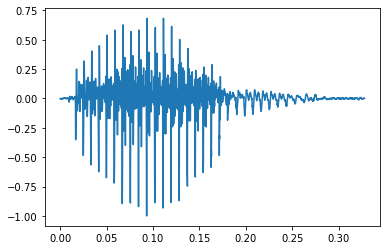

In [11]:
wave.plot()

#### recordings/3_nicolas_25.wav

In [12]:
wave = read_wave('recordings/3_nicolas_25.wav')
wave.normalize()
wave.make_audio()

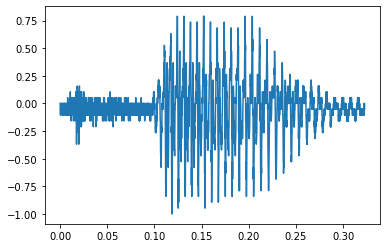

In [13]:
wave.plot()

#### recordings/9_theo_11.wav

In [14]:
wave = read_wave('recordings/9_theo_11.wav')
wave.normalize()
wave.make_audio()

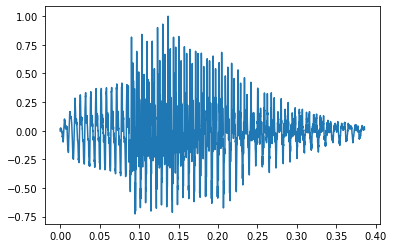

In [15]:
wave.plot()

#### recordings/5_jackson_12.wav

In [16]:
wave = read_wave('recordings/5_jackson_12.wav')
wave.normalize()
wave.make_audio()

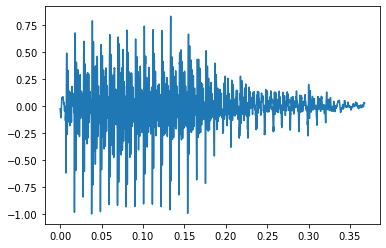

In [17]:
wave.plot()

#### Below created function did not work. It overrides the music player and does not show player in for loop

In [18]:
def play_and_plot_wav(sound_file):
    wave = read_wave(sound_file)
    wave.normalize()
    wave.make_audio()

sound_file = 'recordings/1_yweweler_21.wav'
play_and_plot_wav(sound_file)

## Creating dataframe

In [19]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0

In [20]:
labels = [int(i[0]) for i in all_files]
labels[0:5]

[0, 0, 0, 0, 0]

In [21]:
paths = ['recordings/' + i for i in all_files]
paths[0:5]

['recordings/0_jackson_0.wav',
 'recordings/0_jackson_1.wav',
 'recordings/0_jackson_10.wav',
 'recordings/0_jackson_11.wav',
 'recordings/0_jackson_12.wav']

In [22]:
df_audio = pd.DataFrame()
df_audio['path']  = paths
df_audio['label'] = labels
df_audio.head()

,path,label
0,recordings/0_jackson_0.wav,0
1,recordings/0_jackson_1.wav,0
2,recordings/0_jackson_10.wav,0
3,recordings/0_jackson_11.wav,0
4,recordings/0_jackson_12.wav,0


In [23]:
#Info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [24]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [25]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%

X = df_audio['path']
y = df_audio['label']

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffle
#sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=45)
#sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
#sss.get_n_splits(X, y)
#print(sss)
#for train_index, test_index in sss.split(X, y):
#    #print("train_index:", train_index, "test_index:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]    
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
X_train = X_train.reset_index(drop=True)
X_test  = X_test .reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test .reset_index(drop=True)

In [27]:
print(len(X_train)==1400)
print(len(X_test)==600)
print(len(y_train)==1400)
print(len(y_test)==600)
print(y_train.value_counts())

values_ytrain = list(y_train.value_counts())
print(values_ytrain)
print(len(values_ytrain)==10)
print([i==140 for i in values_ytrain])
print([i==140 for i in values_ytrain])
print(all([i==140 for i in values_ytrain]))

True
True
True
True
4    140
7    140
8    140
5    140
3    140
2    140
6    140
9    140
1    140
0    140
Name: label, dtype: int64
[140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
True
[True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True]
True


<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [14]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [29]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train

In [30]:
wav = X_train[5]
print(wav)
wav_processed = load_wav(wav, get_duration=True)
wav_processed

recordings/5_theo_36.wav


/tmp/ipykernel_418345/2523168021.py:7: FutureWarning: Pass y=[ 0.00013414 -0.00010882 -0.00043474 ...  0.0004205   0.00022156
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  duration = librosa.get_duration(samples, sample_rate)


[array([ 0.00013414, -0.00010882, -0.00043474, ...,  0.0004205 ,
         0.00022156,  0.        ], dtype=float32),
 1.025170068027211]

In [31]:
print(len(wav_processed))
print("Audio in terms of array size", len(wav_processed[0]))
print("with duration", wav_processed[1])

2
Audio in terms of array size 22605
with duration 1.025170068027211


In [32]:
X_train.head()

0        recordings/4_theo_40.wav
1        recordings/7_theo_16.wav
2    recordings/4_yweweler_34.wav
3        recordings/8_theo_45.wav
4    recordings/5_yweweler_39.wav
Name: path, dtype: object

Extracting Duration

In [33]:
# print("Extracting duration for train set ...")
# duration_x_train = [load_wav(i, get_duration=True)[1] for i in tqdm(X_train)]
# print("Extracting duration for test set ...")
# duration_x_test  = [load_wav(i, get_duration=True)[1] for i in tqdm(X_test) ]

print("Extracting duration for train set ...")
try:
    duration_x_train = pickle.load(open("duration_x_train.pickle", "rb"))
except (OSError, IOError) as e:
    duration_x_train = [load_wav(i, get_duration=True)[1] for i in tqdm(X_train)]
    pickle.dump(duration_x_train, open("duration_x_train.pickle", "wb"))
    
print("Extracting duration for test set ...")
try:
    duration_x_test = pickle.load(open("duration_x_test.pickle", "rb"))
except (OSError, IOError) as e:
    duration_x_test = [load_wav(i, get_duration=True)[1] for i in tqdm(X_test)]
    pickle.dump(duration_x_test, open("duration_x_test.pickle", "wb"))

Extracting duration for train set ...
Extracting duration for test set ...


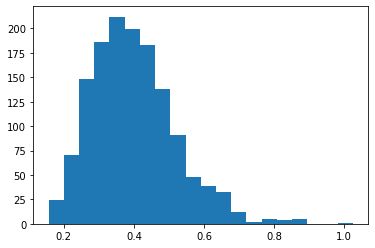

In [34]:
#plot the histogram of the duration for train
plt.hist(duration_x_train, bins=20)
plt.show()

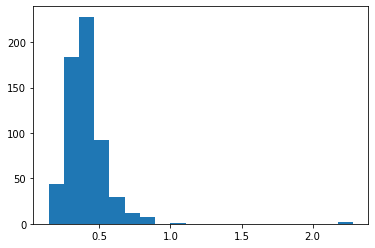

In [35]:
#plot the histogram of the duration for test
plt.hist(duration_x_test, bins=20)
plt.show()

In [36]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in np.arange(0,110,10):
    print(i, 'th pencentile is', np.percentile(duration_x_train, i))

0 th pencentile is 0.1564172335600907
10 th pencentile is 0.25838548752834467
20 th pencentile is 0.2977233560090703
30 th pencentile is 0.32875283446712017
40 th pencentile is 0.3573605442176871
50 th pencentile is 0.38752834467120184
60 th pencentile is 0.4172789115646259
70 th pencentile is 0.4493378684807256
80 th pencentile is 0.48592290249433107
90 th pencentile is 0.555297052154195
100 th pencentile is 1.025170068027211


In [37]:
##print 90 to 100 percentile values with step size of 1. 
for i in np.arange(90,101,1):
    print(i, 'th pencentile is', np.percentile(duration_x_train, i))

90 th pencentile is 0.555297052154195
91 th pencentile is 0.5710530612244898
92 th pencentile is 0.5811446712018141
93 th pencentile is 0.5941251700680278
94 th pencentile is 0.6146702947845805
95 th pencentile is 0.624079365079365
96 th pencentile is 0.6385632653061224
97 th pencentile is 0.6574408163265306
98 th pencentile is 0.6785587301587301
99 th pencentile is 0.7654494331065759
100 th pencentile is 1.025170068027211


Extracting raw data

In [38]:
# print("Extracting array for train set ...")
# #raw_data_x_train = [list(load_wav(i, get_duration=False)) for i in tqdm(X_train)]
# raw_data_x_train = [load_wav(i, get_duration=False) for i in tqdm(X_train)]
# print("Extracting array for test set ...")
# #raw_data_x_test  = [list(load_wav(i, get_duration=False)) for i in tqdm(X_test) ]
# raw_data_x_test  = [load_wav(i, get_duration=False) for i in tqdm(X_test) ]

print("Extracting array for train set ...")
try:
    raw_data_x_train = pickle.load(open("raw_data_x_train.pickle", "rb"))
except (OSError, IOError) as e:
    raw_data_x_train = [load_wav(i, get_duration=False) for i in tqdm(X_train)]
    pickle.dump(raw_data_x_train, open("raw_data_x_train.pickle", "wb"))

print("Extracting array for test set ...")
try:
    raw_data_x_test = pickle.load(open("raw_data_x_test.pickle", "rb"))
except (OSError, IOError) as e:
    raw_data_x_test = [load_wav(i, get_duration=False) for i in tqdm(X_test)]
    pickle.dump(raw_data_x_test, open("raw_data_x_test.pickle", "wb"))

Extracting array for train set ...
Extracting array for test set ...


Creating DataFrames

In [39]:
X_train_processed = pd.DataFrame()
X_train_processed['raw_data'] = raw_data_x_train
X_train_processed['duration'] = duration_x_train

X_test_processed = pd.DataFrame()
X_test_processed['raw_data'] = raw_data_x_test
X_test_processed['duration'] = duration_x_test

In [40]:
X_train_processed.head()

,raw_data,duration
0,"[0.00032207152, 0.00024273545, 6.8777976e-05, ...",0.453878
1,"[-9.936768e-07, -0.00018017775, -0.00044824273...",0.391882
2,"[-0.00030841609, -0.0003603289, -0.00036411113...",0.381134
3,"[0.00027521313, 0.00021813248, 4.1564563e-05, ...",0.289751
4,"[0.00046396037, 0.00043442327, 0.0002750368, 6...",0.430884


<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [41]:
max_length  = 17640

In [42]:
def pad_and_trunc_array(a, max_len):
    size_difference = max_len - len(a)
    #print("size_difference: ", size_difference)
    if( size_difference < 0 ):
        padded = np.array(a[0:size_difference])
        masked = np.full(max_len, True)
    else:
        padded = np.pad(a, pad_width=(0, size_difference), mode='constant')
        masked = np.concatenate([ np.full(len(a), True) , np.full(size_difference, False) ])
    return  padded, masked

print(pad_and_trunc_array([1,2,3], 8))     # [1 2 3 0 0 0 0 0]
print(pad_and_trunc_array([1,2,3,4,5,3,4,5,6,4,5,6,4], 8))

(array([1, 2, 3, 0, 0, 0, 0, 0]), array([ True,  True,  True, False, False, False, False, False]))
(array([1, 2, 3, 4, 5, 3, 4, 5]), array([ True,  True,  True,  True,  True,  True,  True,  True]))


In [43]:
a = X_train_processed['raw_data'][0]
print(a)
print(len(a))
print(X_train_processed['duration'][0])

padded, masked = pad_and_trunc_array(a, max_length)
print(padded)
print(masked)
print(len(padded))
print(len(masked))

[ 3.2207152e-04  2.4273545e-04  6.8777976e-05 ... -4.5380634e-04
 -3.5288825e-04  0.0000000e+00]
10008
0.45387755102040817
[3.2207152e-04 2.4273545e-04 6.8777976e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[ True  True  True ... False False False]
17640
17640


In [44]:
X_train_pad_seq = [ pad_and_trunc_array(a, max_length)[0] for a in tqdm(X_train_processed['raw_data']) ]
X_test_pad_seq  = [ pad_and_trunc_array(a, max_length)[0] for a in tqdm(X_test_processed ['raw_data']) ]

100%|██████████████████████████████████████| 600/600 [00:00<00:00, 27362.78it/s]


In [45]:
X_train_mask = [ pad_and_trunc_array(a, max_length)[1] for a in tqdm(X_train_processed['raw_data']) ]
X_test_mask  = [ pad_and_trunc_array(a, max_length)[1] for a in tqdm(X_test_processed ['raw_data']) ]

100%|██████████████████████████████████████| 600/600 [00:00<00:00, 42223.83it/s]


In [46]:
X_train_pad_seq = np.array(X_train_pad_seq)
X_test_pad_seq  = np.array(X_test_pad_seq)

X_train_mask    = np.array(X_train_mask)
X_test_mask     = np.array(X_test_mask)

In [47]:
X_train_pad_seq[0]

array([3.2207152e-04, 2.4273545e-04, 6.8777976e-05, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [48]:
X_train_mask[0]

array([ True,  True,  True, ..., False, False, False])

Check unique lengths of arrays in both train and test

In [49]:
print(set([len(a) for a in X_train_pad_seq]))
print(set([len(a) for a in X_test_pad_seq]))
print(set([len(a) for a in X_train_mask]))
print(set([len(a) for a in X_test_mask]))

{17640}
{17640}
{17640}
{17640}


In [50]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

### 1. Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [52]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool


In [53]:
print(len(X_train_pad_seq[0]))
max_length = X_train_pad_seq.shape[1]
print(max_length)

17640
17640


In [54]:
X_train_pad_seq

array([[ 3.2207152e-04,  2.4273545e-04,  6.8777976e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.9367685e-07, -1.8017775e-04, -4.4824273e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-3.0841609e-04, -3.6032891e-04, -3.6411113e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-1.9316359e-04, -3.5538251e-06,  2.2410590e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.1480432e-04,  1.1388102e-03,  9.3007687e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.9153558e-05,  3.2730793e-05, -2.8332408e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [55]:
X_train_mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [56]:
#https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/
data = np.array([
[0.1, 1.0],
[0.2, 0.9],
[0.3, 0.8],
[0.4, 0.7],
[0.5, 0.6],
[0.6, 0.5],
[0.7, 0.4],
[0.8, 0.3],
[0.9, 0.2],
[1.0, 0.1]])
print(data.shape)
data = data.reshape(1,10, 2)
print(data.shape)
print(data)

(10, 2)
(1, 10, 2)
[[[0.1 1. ]
  [0.2 0.9]
  [0.3 0.8]
  [0.4 0.7]
  [0.5 0.6]
  [0.6 0.5]
  [0.7 0.4]
  [0.8 0.3]
  [0.9 0.2]
  [1.  0.1]]]


In [57]:
#ValueError: Input 0 of layer "lstm_13" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 17640)
#Resolution: #https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/
# Reshaped the inputs as below

#input_layer1 = Input(shape=(max_length,), name='input_layer1')
# I want to mask the timestep where all the feature values are 1 (usually we pad by 0)
#x = layers.Masking(mask_value=True)(input_layer1)
#x = LSTM(20, return_sequences=False)(x)

In [58]:
#model.add(tf.keras.layers.Masking(mask_value=0.,
#                                  input_shape=(timesteps, features))

In [59]:
X_test_pad_seq

array([[-1.5884702e-04, -1.8318662e-04, -1.8758368e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.0571912e-03, -9.9284658e-03, -8.1389397e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-5.2708446e-04, -4.6854772e-04, -2.5419149e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-8.5355313e-03, -9.9708606e-03, -8.7631410e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-8.9057925e-05, -2.8177176e-04, -4.2608968e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-5.7606393e-04, -9.4869419e-04, -3.2500445e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [60]:
scaler = MinMaxScaler()
scaler.fit(X_train_pad_seq)

X_train_pad_seq = scaler.transform(X_train_pad_seq)
X_test_pad_seq  = scaler.transform(X_test_pad_seq)

In [61]:
X_test_pad_seq

array([[0.7134003 , 0.67746156, 0.6355913 , ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       [0.6756336 , 0.63814604, 0.6004067 , ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       [0.7118374 , 0.67631036, 0.6352966 , ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       ...,
       [0.6778477 , 0.63797504, 0.5976446 , ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       [0.7136965 , 0.6770638 , 0.63453597, ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       [0.71162957, 0.67437327, 0.63498324, ..., 0.6847203 , 0.56513005,
        0.4339641 ]], dtype=float32)

In [62]:
print(X_train_pad_seq.shape)
print(X_test_pad_seq.shape)
print(X_train_mask.shape)
print(X_test_mask.shape)
X_train_pad_seq = X_train_pad_seq.reshape(X_train_pad_seq.shape[0], X_train_pad_seq.shape[1], 1)
X_test_pad_seq  = X_test_pad_seq .reshape(X_test_pad_seq.shape[0] , X_test_pad_seq.shape[1] , 1)
#X_train_mask    = X_train_mask.reshape   (1, X_train_mask.shape[0]   , X_train_mask.shape[1])
#X_test_mask     = X_test_mask.reshape    (1, X_test_mask.shape[0]    , X_test_mask.shape[1])
print(X_train_pad_seq.shape)
print(X_test_pad_seq.shape)
print(X_train_mask.shape)
print(X_test_mask.shape)

(1400, 17640)
(600, 17640)
(1400, 17640)
(600, 17640)
(1400, 17640, 1)
(600, 17640, 1)
(1400, 17640)
(600, 17640)


#### Making LSTM with sequence and masking work - 1

In [63]:
#https://stackoverflow.com/questions/58144336/how-to-mask-the-inputs-in-an-lstm-autoencoder-having-a-repeatvector-layer
input_layer = Input(shape=(1400,17640), name='input_layer1')
input_mask  = Input(shape=(1400,17640), name='input_mask1')
#x = layers.Masking(mask_value=True)(input_layer1)
x = LSTM(20, return_sequences=False)(input_layer)

2022-10-25 04:18:02.213222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 04:18:02.213911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 04:18:02.214107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 04:18:02.214232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

In [64]:
#Below line did nopt work
#x = LSTM(20, return_sequences=False, mask=input_mask)(input_layer)

In [65]:
#X_train_mask = (X_train_pad_seq != 0)

In [66]:
#X_train_pad_seq = X_train_pad_seq.reshape(1400, 17640,1)
#X_train_pad_seq.shape

In [67]:
X_train_mask = X_train_mask.reshape(1400, 17640)

In [68]:
X_train_mask_tensor = tf.convert_to_tensor(X_train_mask)

In [69]:
X_train_mask_tensor.shape

TensorShape([1400, 17640])

In [70]:
# https://www.tensorflow.org/guide/keras/masking_and_padding#writing_layers_that_need_mask_information
from tensorflow.keras import layers
class MyLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(MyLayer, self).__init__(**kwargs)
        #self.embedding = layers.Embedding(input_dim=(1400,17640), output_dim=16, mask_zero=True)
        self.lstm = layers.LSTM(1)

    def call(self, inputs, inputs_mask):
        #x = self.embedding(inputs)
        # Note that you could also prepare a `mask` tensor manually.
        # It only needs to be a boolean tensor
        # with the right shape, i.e. (batch_size, timesteps).
        #mask = self.embedding.compute_mask(inputs)
        #output = self.lstm(x, mask=mask)  # The layer will ignore the masked values
        
        output = self.lstm(inputs, mask=inputs_mask)  # The layer will ignore the masked values
        
        #input_layer = Input(shape=(1400,17640), name='input_layer1')
        #output = LSTM(20, return_sequences=False)(input_layer)
        #self.lstm = output
        return output

In [71]:
layer = MyLayer()
layer(X_train_pad_seq, X_train_mask_tensor)

2022-10-25 04:18:03.314496: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


<tf.Tensor: shape=(1400, 1), dtype=float32, numpy=
array([[0.33606943],
       [0.29435512],
       [0.28123662],
       ...,
       [0.30983394],
       [0.33446342],
       [0.32986888]], dtype=float32)>

In [72]:
MyLayer()(X_train_pad_seq, X_train_mask_tensor)

<tf.Tensor: shape=(1400, 1), dtype=float32, numpy=
array([[-0.42300752],
       [-0.43099883],
       [-0.43328816],
       ...,
       [-0.42613643],
       [-0.41782144],
       [-0.43064716]], dtype=float32)>

In [73]:
MyLayer()

In [74]:
type(X_train_mask_tensor)

tensorflow.python.framework.ops.EagerTensor

LSTM is now working with mask

#### Making LSTM with sequence and masking work - 2

In [75]:
# https://www.tensorflow.org/guide/keras/masking_and_padding#writing_layers_that_need_mask_information
from tensorflow.keras import layers
class MyLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(MyLayer, self).__init__(**kwargs)
        self.lstm = layers.LSTM(2)

    def call(self, inputs, inputs_mask):  
        inputs_mask = tf.convert_to_tensor(inputs_mask)
        output = self.lstm(inputs, mask=inputs_mask)  # The layer will ignore the masked values
        
        return output

MyLayer()(X_train_pad_seq, X_train_mask)    

<tf.Tensor: shape=(1400, 2), dtype=float32, numpy=
array([[-0.12766269, -0.18784039],
       [-0.1246729 , -0.17714246],
       [-0.12529355, -0.17045777],
       ...,
       [-0.12223399, -0.18118913],
       [-0.12636414, -0.18525407],
       [-0.12961371, -0.18892628]], dtype=float32)>

In [76]:
#y_train is not one hot encoded because loss used below is sparse_categorical_crossentropy
#y_train needs one hot encoding when we need to use categorical_crossentropy as loss

#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, num_classes=10)
#y_test  = to_categorical(y_test , num_classes=10)

#### Making LSTM with sequence and masking work - 3

In [77]:
# https://www.tensorflow.org/guide/keras/masking_and_padding#writing_layers_that_need_mask_information
from tensorflow.keras import layers
import tensorflow as tf
from keras.layers import LeakyReLU
class MyLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(MyLayer, self).__init__(**kwargs)
        self.lstm = layers.LSTM(8, name='lstm_layer_12_instances')
        
        self.dense1 = layers.Dense(256,activation= LeakyReLU(), name ='dense_layer1', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))
        #self.bn = layers.BatchNormalization(name='batch_normalization')
        self.dense2 = layers.Dense(128,activation='relu', name ='dense_layer2', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))
        self.dense3 = layers.Dense(64,activation='relu', name ='dense_layer3', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))
        self.dense4 = layers.Dense(10, name ='dense_layer_softmax',activation='softmax') 

    def call(self, inputs):  
        inputs_mask = tf.convert_to_tensor(inputs[1])
        output = self.lstm(inputs[0], mask=inputs_mask)  # The layer will ignore the masked values        
        output = self.dense1(output)
        #output = self.bn(output)
        output = self.dense2(output)
        output = self.dense3(output)
        output = self.dense4(output)
        return output

#MyLayer()([X_train_pad_seq, X_train_mask])

input1 = Input(shape=(17640,1), dtype='float32', name='input1')
input2 = Input(shape=(17640)  , dtype='bool'   , name='input2')

print(type(input1))
print(type(input2))

outputs = MyLayer()([input1, input2])

model = keras.Model([input1, input2], outputs)
#print(model.summary())

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss="sparse_categorical_crossentropy",
              metrics   =['accuracy'
                          , tfa.metrics.FBetaScore(num_classes=10, average='micro')
                         ])

#Tensorboard
#Run this command in command prompt while model is getting trained
#    %tensorboard --logdir logs_tsboard/fit/    
%load_ext tensorboard
log_dir="logs_tsboard/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1, 
                                                      write_graph=True,
                                                      write_grads=True)

history_model1 = model.fit([X_train_pad_seq, X_train_mask], y_train 
          , validation_data=([X_test_pad_seq, X_test_mask], y_test)
          , epochs=15, batch_size=32, verbose=1
          , callbacks=[tensorboard_callback])

<class 'keras.engine.keras_tensor.KerasTensor'>
<class 'keras.engine.keras_tensor.KerasTensor'>
Epoch 1/15


2022-10-25 04:18:07.027947: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_40/output/_19'


44/44 [==============================] - 15s 286ms/step - loss: 6.1523 - accuracy: 0.0964 - fbeta_score: 0.1957 - val_loss: 5.5273 - val_accuracy: 0.1000 - val_fbeta_score: 0.1957
Epoch 2/15
44/44 [==============================] - 12s 268ms/step - loss: 5.1041 - accuracy: 0.0964 - fbeta_score: 0.1957 - val_loss: 4.7154 - val_accuracy: 0.1050 - val_fbeta_score: 0.1957
Epoch 3/15
44/44 [==============================] - 12s 269ms/step - loss: 4.4472 - accuracy: 0.0900 - fbeta_score: 0.1957 - val_loss: 4.1947 - val_accuracy: 0.1067 - val_fbeta_score: 0.1957
Epoch 4/15
44/44 [==============================] - 12s 269ms/step - loss: 4.0106 - accuracy: 0.1064 - fbeta_score: 0.1957 - val_loss: 3.8337 - val_accuracy: 0.1167 - val_fbeta_score: 0.1957
Epoch 5/15
44/44 [==============================] - 12s 268ms/step - loss: 3.6979 - accuracy: 0.0943 - fbeta_score: 0.1957 - val_loss: 3.5647 - val_accuracy: 0.1050 - val_fbeta_score: 0.1957
Epoch 6/15
44/44 [==============================] - 12s 

### 2. Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [78]:
sample_rate = 22050

In [11]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [80]:
X_train_pad_seq = X_train_pad_seq.reshape(X_train_pad_seq.shape[0], X_train_pad_seq.shape[1])
X_test_pad_seq  = X_test_pad_seq .reshape(X_test_pad_seq.shape[0], X_test_pad_seq.shape[1])

In [81]:
X_test_pad_seq

array([[0.7134003 , 0.67746156, 0.6355913 , ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       [0.6756336 , 0.63814604, 0.6004067 , ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       [0.7118374 , 0.67631036, 0.6352966 , ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       ...,
       [0.6778477 , 0.63797504, 0.5976446 , ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       [0.7136965 , 0.6770638 , 0.63453597, ..., 0.6847203 , 0.56513005,
        0.4339641 ],
       [0.71162957, 0.67437327, 0.63498324, ..., 0.6847203 , 0.56513005,
        0.4339641 ]], dtype=float32)

In [82]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram = [convert_to_spectrogram(seq) for seq in tqdm(X_train_pad_seq)]
X_test_spectrogram  = [convert_to_spectrogram(seq) for seq in tqdm(X_test_pad_seq)]

X_train_spectrogram = np.array(X_train_spectrogram)
X_test_spectrogram  = np.array(X_test_spectrogram)

print(X_train_spectrogram.shape)
print(X_test_spectrogram.shape)

100%|████████████████████████████████████████| 600/600 [00:00<00:00, 688.83it/s]

(1400, 64, 35)
(600, 64, 35)


In [83]:
X_test_spectrogram[0:2]

array([[[  0.        ,  -0.583971  ,  -2.0007    , ...,  -2.359026  ,
          -2.0044575 ,  -0.08097649],
        [-10.188082  , -15.829582  , -27.906315  , ..., -11.300029  ,
         -12.754385  ,  -9.824358  ],
        [-14.114077  , -19.249008  , -28.071999  , ..., -14.659224  ,
         -16.606228  , -15.238558  ],
        ...,
        [-45.235916  , -48.78118   , -50.605072  , ..., -44.47972   ,
         -42.506527  , -42.745087  ],
        [-44.906     , -47.93766   , -49.009598  , ..., -43.939034  ,
         -42.04281   , -44.028946  ],
        [-44.78853   , -48.278893  , -50.794563  , ..., -43.2485    ,
         -42.097023  , -43.82366   ]],

       [[ -0.3274021 ,  -0.74352646,  -2.097559  , ...,  -2.2780495 ,
          -1.923481  ,   0.        ],
        [-10.717948  , -15.470133  , -16.97586   , ..., -11.219052  ,
         -12.6734085 ,  -9.7433815 ],
        [-13.905923  , -17.017256  , -16.548956  , ..., -14.578247  ,
         -16.525253  , -15.157581  ],
        ...,



Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [84]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above

In [85]:
#compile and fit your model.
#model2.fit([X_train_spectrogram],y_train_int,......)

In [86]:
# https://www.tensorflow.org/guide/keras/masking_and_padding#writing_layers_that_need_mask_information
from tensorflow.keras import layers
import tensorflow as tf
from keras.layers import LeakyReLU

input_layer1 = Input(shape=(64, 35), dtype='float32', name='input1')
print("input_layer1 : layers.Input type: ", type(x))
print("input_layer1: layers.Input shape: ", x.shape)

x = layers.LSTM(64, name='lstm_layer_instances')(input_layer1)
print("x : layers.LSTM type: ", type(x))
print("x: layers.LSTM shape: ", x.shape)
x = layers.Dense(512,activation= 'relu', name ='dense_layer1', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))(x)
#x = layers.Dense(512,activation= LeakyReLU(), name ='dense_layer1', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))(x)
#x = layers.Dense(1024,activation= LeakyReLU(), name ='dense_layer2', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))(x)
#x = layers.Dense(512,activation= LeakyReLU(), name ='dense_layer3', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))(x)

dense_softmax = layers.Dense(10, name ='dense_layer_softmax',activation='softmax')(x)

model2 = Model(inputs=input_layer1, outputs=dense_softmax)
print("Model Summary:")
#model1.summary()

print(model2.summary())

model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss="sparse_categorical_crossentropy",
              metrics   =['accuracy'
                          , tfa.metrics.FBetaScore(num_classes=10, average='micro')
                         ])

#Tensorboard
#Run this command in command prompt while model is getting trained
#    %tensorboard --logdir logs_tsboard/fit/    
%load_ext tensorboard
log_dir="logs_tsboard/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1, 
                                                      write_graph=True,
                                                      write_grads=True)

#https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# patient early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.01, verbose=1, patience=200)
mc = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


model_history2 = model2.fit(X_train_spectrogram, y_train 
          , validation_data=(X_test_spectrogram, y_test)
          , epochs=5000, batch_size=256, verbose=1
          , callbacks=[tensorboard_callback, es, mc])

input_layer1 : layers.Input type:  <class 'keras.engine.keras_tensor.KerasTensor'>
input_layer1: layers.Input shape:  (None, 20)
x : layers.LSTM type:  <class 'keras.engine.keras_tensor.KerasTensor'>
x: layers.LSTM shape:  (None, 64)
Model Summary:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input1 (InputLayer)         [(None, 64, 35)]          0         
                                                                 
 lstm_layer_instances (LSTM)  (None, 64)               25600     
                                                                 
 dense_layer1 (Dense)        (None, 512)               33280     
                                                                 
 dense_layer_softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 64,010
Trainable params: 64,010
Non-trainable params: 0
____

In [87]:
best_model1 = load_model('best_model2.h5')
# evaluate the model
_, train_acc, train_fbeta_score = best_model1.evaluate(X_train_spectrogram, y_train, verbose=1)
_, test_acc, test_fbeta_score = best_model1.evaluate(X_test_spectrogram, y_test, verbose=1)
print('train_acc: %.3f, test_acc: %.3f' % (train_acc, test_acc))
print('train_fbeta_score: %.3f, test_fbeta_score: %.3f' % (train_fbeta_score, test_fbeta_score))

19/19 [==============================] - 0s 2ms/step - loss: 1.1071 - accuracy: 0.6550 - fbeta_score: 0.1957
train_acc: 0.741, test_acc: 0.655
train_fbeta_score: 0.196, test_fbeta_score: 0.196


### 3. Data augmentation with raw features 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [88]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [89]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [90]:
df_audio.head()

,path,label
766,recordings/3_yweweler_35.wav,3
182,recordings/0_yweweler_33.wav,0
1763,recordings/8_yweweler_24.wav,8
1814,recordings/9_jackson_28.wav,9
596,recordings/2_yweweler_9.wav,2


In [91]:
len(aug_temp)

9

In [92]:
aug_temp[0].shape

(11140,)

In [93]:
aug_temp

[array([-1.2616636e-05, -7.9075708e-06, -1.3377466e-05, ...,
         2.9990039e-04,  2.5306371e-04,  2.6495595e-04], dtype=float32),
 array([-1.6780266e-05, -9.4096958e-06, -1.8098801e-05, ...,
        -3.2190877e-04, -3.4930362e-04, -4.2746324e-04], dtype=float32),
 array([-1.43640345e-05, -9.45648026e-06, -1.83207849e-05, ...,
        -1.91900908e-04, -2.15360968e-04,  0.00000000e+00], dtype=float32),
 array([-1.5891865e-05, -1.0822078e-05, -1.6490167e-05, ...,
        -2.6612528e-04, -4.7634164e-04,  0.0000000e+00], dtype=float32),
 array([-1.8938876e-05, -1.1114389e-05, -2.1091364e-05, ...,
        -2.9442625e-04, -1.7467893e-04, -5.6144064e-08], dtype=float32),
 array([-1.6830121e-05, -1.1982112e-05, -2.2072518e-05, ...,
         1.9665981e-04,  2.0516208e-04,  2.2930111e-04], dtype=float32),
 array([-6.9382559e-06, -4.4478111e-06, -1.5671083e-05, ...,
        -3.5719451e-04, -3.8037001e-04,  0.0000000e+00], dtype=float32),
 array([-8.50849574e-06, -2.57797660e-06, -1.61099706e-0

## Follow the steps 

1. Split data 'df_audio' into train and test (80-20 split)

2. We have 2000 data points(1600 train points, 400 test points) 



In [94]:
X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],df_audio['label'],random_state=45,test_size=0.2,stratify=df_audio['label'])

In [95]:
X_train.shape

(1600,)

In [96]:
y_test.shape

(400,)

In [97]:
y_train.shape

(1600,)

3. Do augmentation only on X_train,pass each point of X_train to generate_augmented_data function.After augmentation we will get 14400 train points. Make sure that you are augmenting the corresponding class labels (y_train) also.
4. Preprocess your X_test using load_wav function.
5. Convert the augmented_train_data and test_data to numpy arrays.
6. Perform padding and masking on augmented_train_data and test_data.
7. After padding define the model similar to model 1 and fit the data

<font color='red'> Note </font> - While fitting your model on the augmented data for model 3 you might face Resource exhaust error. One simple hack to avoid that is save the augmented_train_data,augment_y_train,test_data and y_test to Drive or into your local system. Then restart the runtime so that now you can train your model with full RAM capacity. Upload these files again in the new runtime session perform padding and masking and then fit your model.

In [98]:
try:
    augmented_train_data = pickle.load(open("augmented_train_data.pickle", "rb"))
except (OSError, IOError) as e:
    augmented_train_data = []
    for path in tqdm(X_train):
        aug_temp = generate_augmented_data(path)
        augmented_train_data = augmented_train_data + aug_temp
    pickle.dump(augmented_train_data, open("augmented_train_data.pickle", "wb"))

In [99]:
y_train.shape

(1600,)

In [100]:
augment_y_train = np.ravel([[label]*9 for label in tqdm(y_train)])

100%|██████████████████████████████████| 1600/1600 [00:00<00:00, 1568697.15it/s]


In [101]:
len(augmented_train_data)

14400

In [102]:
len(augment_y_train)

14400

In [103]:
len(X_train)

1600

In [104]:
len(augment_y_train)

14400

In [105]:
X_test[0:2]

578      recordings/1_yweweler_8.wav
1767    recordings/8_yweweler_28.wav
Name: path, dtype: object

In [106]:
try:
    test_data = pickle.load(open("test_data.pickle", "rb"))
except (OSError, IOError) as e:
    test_data = [load_wav(i, get_duration=False) for i in tqdm(X_test)]
    pickle.dump(test_data, open("test_data.pickle", "wb"))

In [107]:
# All the arrays in augmented_train_data do not have same number of elements.
# np.stack(augmented_train_data)
# ValueError: all input arrays must have the same shape
augmented_train_data[0:2]

[array([-4.5108154e-05, -8.4356237e-05, -1.0396687e-04, ...,
         3.0292973e-05, -1.9925243e-04,  0.0000000e+00], dtype=float32),
 array([-2.7481223e-05, -6.5589178e-05, -8.9112633e-05, ...,
         1.6384917e-04, -8.9188106e-05, -2.0623504e-04], dtype=float32)]

In [108]:
lengths_augmented_train_data = [len(i) for i in augmented_train_data]

for i in np.arange(0,101,5):
    print(np.percentile(lengths_augmented_train_data, i), i,"percentile")

2435.0 0 percentile
4612.0 5 percentile
5279.9 10 percentile
5816.0 15 percentile
6225.0 20 percentile
6684.75 25 percentile
7095.799999999999 30 percentile
7447.65 35 percentile
7832.4000000000015 40 percentile
8226.650000000001 45 percentile
8676.5 50 percentile
9151.0 55 percentile
9641.999999999998 60 percentile
10199.0 65 percentile
10759.0 70 percentile
11417.75 75 percentile
12357.0 80 percentile
13365.499999999996 85 percentile
14499.0 90 percentile
16339.79999999996 95 percentile
71907.0 100 percentile


#### 16500 I can decide as max length, pading and truccations to be done accordingly

In [8]:
max_length = 16500

In [109]:


X_train_pad_seq = [ pad_and_trunc_array(a, max_length)[0] for a in tqdm(augmented_train_data ) ]
X_test_pad_seq  = [ pad_and_trunc_array(a, max_length)[0] for a in tqdm(test_data ) ]

X_train_mask = [ pad_and_trunc_array(a, max_length)[1] for a in tqdm(augmented_train_data ) ]
X_test_mask  = [ pad_and_trunc_array(a, max_length)[1] for a in tqdm(test_data ) ]

100%|██████████████████████████████████████| 400/400 [00:00<00:00, 41345.60it/s]


In [110]:
X_train_pad_seq = np.stack(X_train_pad_seq)
X_test_pad_seq = np.stack(X_test_pad_seq)
print(X_train_pad_seq.shape)
print(X_test_pad_seq.shape)

(14400, 16500)
(400, 16500)


In [111]:
X_train_mask = np.stack(X_train_mask)
X_test_mask = np.stack(X_test_mask)
print(X_train_mask.shape)
print(X_test_mask.shape)

(14400, 16500)
(400, 16500)


In [112]:
# y_train = np.stack(y_train)
# y_test = np.stack(y_train)
print(augment_y_train.shape)
print(y_test.shape)

(14400,)
(400,)


In [5]:
try:
    X_train_pad_seq = pickle.load(open("X_train_pad_seq.m3.pickle", "rb"))
except (OSError, IOError) as e:
    pickle.dump(X_train_pad_seq, open("X_train_pad_seq.m3.pickle", "wb"))


In [6]:
                            
try:
    X_train_mask = pickle.load(open("X_train_mask.m3.pickle", "rb"))
except (OSError, IOError) as e:
    pickle.dump(X_train_mask, open("X_train_mask.m3.pickle", "wb"))
                            
try:
    X_test_pad_seq = pickle.load(open("X_test_pad_seq.m3.pickle", "rb"))
except (OSError, IOError) as e:
    pickle.dump(X_test_pad_seq, open("X_test_pad_seq.m3.pickle", "wb"))
                            
try:
    X_test_mask = pickle.load(open("X_test_mask.m3.pickle", "rb"))
except (OSError, IOError) as e:
    pickle.dump(X_test_mask, open("X_test_mask.m3.pickle", "wb"))
                            
try:
    augment_y_train = pickle.load(open("augment_y_train.m3.pickle", "rb"))
except (OSError, IOError) as e:
    pickle.dump(augment_y_train, open("augment_y_train.m3.pickle", "wb"))
                            
try:
    y_test = pickle.load(open("y_test.m3.pickle", "rb"))
except (OSError, IOError) as e:
    pickle.dump(y_test, open("y_test.m3.pickle", "wb"))

In [10]:
# https://www.tensorflow.org/guide/keras/masking_and_padding#writing_layers_that_need_mask_information
from tensorflow.keras import layers
import tensorflow as tf
from keras.layers import LeakyReLU
class MyLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(MyLayer, self).__init__(**kwargs)
        self.lstm = layers.LSTM(8, name='lstm_layer_12_instances')
        
        self.dense1 = layers.Dense(256,activation= LeakyReLU(), name ='dense_layer1', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))
        #self.bn = layers.BatchNormalization(name='batch_normalization')
        self.dense2 = layers.Dense(128,activation='relu', name ='dense_layer2', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))
        self.dense3 = layers.Dense(64,activation='relu', name ='dense_layer3', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))
        self.dense4 = layers.Dense(10, name ='dense_layer_softmax',activation='softmax') 

    def call(self, inputs):  
        inputs_mask = tf.convert_to_tensor(inputs[1])
        output = self.lstm(inputs[0], mask=inputs_mask)  # The layer will ignore the masked values        
        output = self.dense1(output)
        #output = self.bn(output)
        output = self.dense2(output)
        output = self.dense3(output)
        output = self.dense4(output)
        return output

#MyLayer()([X_train_pad_seq, X_train_mask])

input1 = Input(shape=(max_length,1), dtype='float32', name='input1')
input2 = Input(shape=(max_length)  , dtype='bool'   , name='input2')

# print(type(input1))
# print(type(input2))

outputs = MyLayer()([input1, input2])

model3 = keras.Model([input1, input2], outputs)
#print(model.summary())

model3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss="sparse_categorical_crossentropy",
              metrics   =['accuracy'
                          , tfa.metrics.FBetaScore(num_classes=10, average='micro')
                         ])

#Tensorboard
#Run this command in command prompt while model is getting trained
#    %tensorboard --logdir logs_tsboard/fit/    
%load_ext tensorboard
log_dir="logs_tsboard/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1, 
                                                      write_graph=True,
                                                      write_grads=True)

history_model3 = model3.fit([X_train_pad_seq, X_train_mask], augment_y_train 
          , validation_data=([X_test_pad_seq, X_test_mask], y_test)
          , epochs=15, batch_size=128, verbose=1
          , callbacks=[tensorboard_callback])

2022-10-25 04:28:06.628502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 04:28:06.629430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 04:28:06.629638: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 04:28:06.629765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

Epoch 1/15


2022-10-25 04:28:09.839999: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT8
    }
  }
}

	while inferring type of node 'cond_40/output/_26'
2022-10-25 04:28:10.355606: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


113/113 [==============================] - 39s 317ms/step - loss: 5.0853 - accuracy: 0.0970 - fbeta_score: 0.1957 - val_loss: 4.1005 - val_accuracy: 0.1000 - val_fbeta_score: 0.1957
Epoch 2/15
113/113 [==============================] - 36s 317ms/step - loss: 3.6860 - accuracy: 0.0918 - fbeta_score: 0.1957 - val_loss: 3.3658 - val_accuracy: 0.1000 - val_fbeta_score: 0.1957
Epoch 3/15
113/113 [==============================] - 35s 313ms/step - loss: 3.1595 - accuracy: 0.0978 - fbeta_score: 0.1957 - val_loss: 2.9784 - val_accuracy: 0.1000 - val_fbeta_score: 0.1957
Epoch 4/15
113/113 [==============================] - 35s 310ms/step - loss: 2.8463 - accuracy: 0.0988 - fbeta_score: 0.1957 - val_loss: 2.7283 - val_accuracy: 0.1000 - val_fbeta_score: 0.1957
Epoch 5/15
113/113 [==============================] - 35s 307ms/step - loss: 2.6418 - accuracy: 0.0944 - fbeta_score: 0.1957 - val_loss: 2.5647 - val_accuracy: 0.1000 - val_fbeta_score: 0.1957
Epoch 6/15
113/113 [==========================

### 4. Data augmentation with spectogram data

1. use convert_to_spectrogram and convert the padded data from train and test data to spectogram data.
2. The shape of train data will be 14400 x 64 x 35 and shape of test_data will be 400 x 64 x35
3. Define the model similar to model 2 and fit the data

In [19]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram = [convert_to_spectrogram(seq) for seq in tqdm(X_train_pad_seq)]
X_test_spectrogram  = [convert_to_spectrogram(seq) for seq in tqdm(X_test_pad_seq)]

X_train_spectrogram = np.array(X_train_spectrogram)
X_test_spectrogram  = np.array(X_test_spectrogram)

print(X_train_spectrogram.shape)
print(X_test_spectrogram.shape)




  0%|                                                 | 0/14400 [00:00<?, ?it/s]


  1%|▏                                      | 75/14400 [00:00<00:19, 740.10it/s]


  1%|▍                                     | 150/14400 [00:00<00:20, 707.15it/s]


  2%|▌                                     | 222/14400 [00:00<00:19, 710.23it/s]


  2%|▊                                     | 297/14400 [00:00<00:19, 722.28it/s]


  3%|▉                                     | 370/14400 [00:00<00:20, 685.71it/s]


  3%|█▏                                    | 446/14400 [00:00<00:19, 707.03it/s]


  4%|█▎                                    | 517/14400 [00:00<00:19, 706.01it/s]


  4%|█▌                                    | 591/14400 [00:00<00:19, 714.06it/s]


  5%|█▋                                    | 663/14400 [00:00<00:20, 677.60it/s]


  5%|█▉                                    | 732/14400 [00:01<00:20, 657.18it/s]


  6%|██                                    | 802/14400 [00:01<00:20, 666.92it/s]


 

(14400, 64, 33)
(400, 64, 33)


In [20]:
# https://www.tensorflow.org/guide/keras/masking_and_padding#writing_layers_that_need_mask_information
from tensorflow.keras import layers
import tensorflow as tf
from keras.layers import LeakyReLU

input_layer1 = Input(shape=(64, 33), dtype='float32', name='input1')
# print("input_layer1 : layers.Input type: ", type(x))
# print("input_layer1: layers.Input shape: ", x.shape)

x = layers.LSTM(64, name='lstm_layer_instances')(input_layer1)
print("x : layers.LSTM type: ", type(x))
print("x: layers.LSTM shape: ", x.shape)
x = layers.Dense(512,activation= 'relu', name ='dense_layer1', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))(x)
#x = layers.Dense(512,activation= LeakyReLU(), name ='dense_layer1', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))(x)
#x = layers.Dense(1024,activation= LeakyReLU(), name ='dense_layer2', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))(x)
#x = layers.Dense(512,activation= LeakyReLU(), name ='dense_layer3', kernel_initializer= 'he_uniform' ,  kernel_regularizer = tf.keras.regularizers.l2(l = 0.005))(x)

dense_softmax = layers.Dense(10, name ='dense_layer_softmax',activation='softmax')(x)

model4 = Model(inputs=input_layer1, outputs=dense_softmax)
print("Model Summary:")
#model1.summary()

print(model4.summary())

model4.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss="sparse_categorical_crossentropy",
              metrics   =['accuracy'
                          , tfa.metrics.FBetaScore(num_classes=10, average='micro')
                         ])

#Tensorboard
#Run this command in command prompt while model is getting trained
#    %tensorboard --logdir logs_tsboard/fit/    
%load_ext tensorboard
log_dir="logs_tsboard/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1, 
                                                      write_graph=True,
                                                      write_grads=True)

#https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# patient early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.01, verbose=1, patience=200)
mc = ModelCheckpoint('best_model4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


model_history4 = model4.fit(X_train_spectrogram, augment_y_train 
          , validation_data=(X_test_spectrogram, y_test)
          , epochs=5000, batch_size=256, verbose=1
          , callbacks=[tensorboard_callback, es, mc])

x : layers.LSTM type:  <class 'keras.engine.keras_tensor.KerasTensor'>
x: layers.LSTM shape:  (None, 64)
Model Summary:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input1 (InputLayer)         [(None, 64, 33)]          0         
                                                                 
 lstm_layer_instances (LSTM)  (None, 64)               25088     
                                                                 
 dense_layer1 (Dense)        (None, 512)               33280     
                                                                 
 dense_layer_softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 63,498
Trainable params: 63,498
Non-trainable params: 0
_________________________________________________________________
None
The tensorboard extension is already loaded. To reload it, use

In [29]:
best_model4 = load_model('best_model4.h5')
# evaluate the model
_, train_acc, train_fbeta_score = best_model4.evaluate(X_train_spectrogram, augment_y_train, verbose=1)
_, test_acc, test_fbeta_score = best_model4.evaluate(X_test_spectrogram, y_test.values, verbose=1)
print('train_acc: %.3f, test_acc: %.3f' % (train_acc, test_acc))
print('train_fbeta_score: %.3f, test_fbeta_score: %.3f' % (train_fbeta_score, test_fbeta_score))

13/13 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8850 - fbeta_score: 0.1957
train_acc: 0.907, test_acc: 0.885
train_fbeta_score: 0.196, test_fbeta_score: 0.196
